## Minimum example with TensorFlow 2.15


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 100

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size, kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                     bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                    )
                                      ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)




Epoch 1/100

4/4 - 0s - loss: 211.1140 - 423ms/epoch - 106ms/step
Epoch 2/100
4/4 - 0s - loss: 31.0639 - 20ms/epoch - 5ms/step
Epoch 3/100
4/4 - 0s - loss: 12.4468 - 0s/epoch - 0s/step
Epoch 4/100
4/4 - 0s - loss: 11.2245 - 18ms/epoch - 5ms/step
Epoch 5/100
4/4 - 0s - loss: 6.5202 - 11ms/epoch - 3ms/step
Epoch 6/100
4/4 - 0s - loss: 6.2438 - 2ms/epoch - 524us/step
Epoch 7/100
4/4 - 0s - loss: 4.0622 - 17ms/epoch - 4ms/step
Epoch 8/100
4/4 - 0s - loss: 2.8562 - 11ms/epoch - 3ms/step
Epoch 9/100
4/4 - 0s - loss: 2.0586 - 1ms/epoch - 360us/step
Epoch 10/100
4/4 - 0s - loss: 1.6140 - 16ms/epoch - 4ms/step
Epoch 11/100
4/4 - 0s - loss: 1.3367 - 11ms/epoch - 3ms/step
Epoch 12/100
4/4 - 0s - loss: 1.8552 - 3ms/epoch - 770us/step
Epoch 13/100
4/4 - 0s - loss: 2.7250 - 16ms/epoch - 4ms/step
Epoch 14/100
4/4 - 0s - loss: 0.8068 - 3ms/epoch - 636us/step
Epoch 15/100
4/4 - 0s - loss: 0.6176 - 6ms/epoch - 1ms/step
Epoch 16/100
4/4 - 0s - loss: 0.5786 - 15ms/epoch - 4ms/step
Epoch 17/100
4/4 - 0s -

## Extract the weights and bias

In [5]:
model.layers[0].get_weights()

[array([[ 1.9840328],
        [-3.025356 ]], dtype=float32),
 array([5.0430984], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9840328],
       [-3.025356 ]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0430984], dtype=float32)

## Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  9.1],
       [ -7.3],
       [-27. ],
       [-15.2],
       [-25.2],
       [-19.5],
       [ 21.7],
       [  2.7],
       [ -0.5],
       [ 20.6],
       [-36. ],
       [  3.4],
       [  8.4],
       [-17.2],
       [ 29.5],
       [-18.6],
       [  5. ],
       [ -1.5],
       [ 20.6],
       [  3.2],
       [-28.4],
       [ 31.2],
       [  4.9],
       [  2.9],
       [ 38.6],
       [-11. ],
       [ 52.6],
       [-30.5],
       [-21. ],
       [  7.4],
       [ 14.9],
       [ 25.1],
       [ 18.1],
       [ 24.8],
       [ -7.2],
       [  1.1],
       [-14.8],
       [ 51.3],
       [ -5.6],
       [ 12.4],
       [  7.8],
       [-15.5],
       [ 19.2],
       [-21.2],
       [ 18. ],
       [  0.2],
       [-11.9],
       [ -0.5],
       [  9.3],
       [  4.7],
       [ 29.2],
       [ 26. ],
       [-11.1],
       [ 36.2],
       [ 16.7],
       [ 19.5],
       [-10.6],
       [-33.9],
       [-11.2],
       [ 45.8],
       [ -5.8],
       [-16.8],
       [

In [9]:
training_data['targets'].round(1)

array([[  9.5],
       [ -8.1],
       [-26.9],
       [-15.9],
       [-25.7],
       [-18.8],
       [ 22.7],
       [  2.3],
       [ -0.3],
       [ 19.9],
       [-35.2],
       [  3.9],
       [  8.8],
       [-17. ],
       [ 29.9],
       [-19.3],
       [  5.9],
       [ -1.8],
       [ 20.9],
       [  3.6],
       [-28. ],
       [ 31.2],
       [  5.2],
       [  3.2],
       [ 39.1],
       [-11.5],
       [ 51.7],
       [-30.7],
       [-20.1],
       [  7.9],
       [ 14.6],
       [ 24.1],
       [ 17.2],
       [ 25.4],
       [ -8. ],
       [  2.1],
       [-15.6],
       [ 50.6],
       [ -5.2],
       [ 12.9],
       [  7. ],
       [-14.7],
       [ 19.4],
       [-21.2],
       [ 18.5],
       [  0.5],
       [-12.1],
       [ -1.7],
       [  9.2],
       [  5.8],
       [ 29.2],
       [ 25.9],
       [-10.6],
       [ 35.5],
       [ 17.6],
       [ 20.2],
       [-10.1],
       [-34.6],
       [-10.3],
       [ 44.9],
       [ -5.2],
       [-16.6],
       [

## Plotting the data

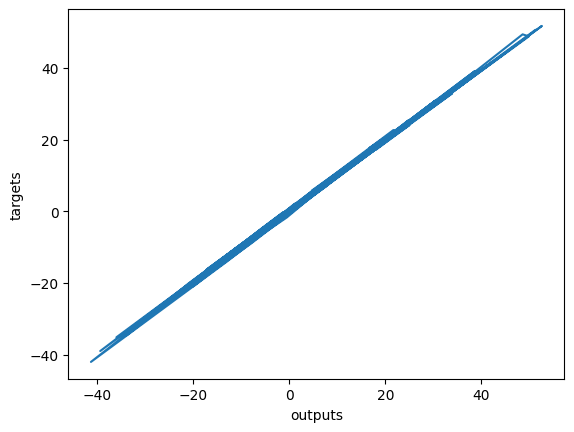

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [12]:
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

## Data

In [18]:
mnist_datasets, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)



## Preprocessing

In [20]:
mnist_train, mnist_test = mnist_datasets['train'], mnist_datasets['test']

num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples,tf.int64)

def scale(image,label):
    image = tf.cast(image, tf.float32)
    image /=255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data= validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

# Model

## Outline the model

In [25]:
input_size = 784
output_size = 10
hidden_layer_size = 100

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax')
                            ])

## Choose the optimizer and the loss function

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training

In [27]:
NUM_EPOCHS = 5

model.fit(train_data, epochs = NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/5
540/540 - 2s - loss: 0.3296 - accuracy: 0.9044 - val_loss: 0.1640 - val_accuracy: 0.9538 - 2s/epoch - 4ms/step
Epoch 2/5
540/540 - 1s - loss: 0.1405 - accuracy: 0.9584 - val_loss: 0.1074 - val_accuracy: 0.9680 - 1s/epoch - 3ms/step
Epoch 3/5
540/540 - 1s - loss: 0.0992 - accuracy: 0.9705 - val_loss: 0.0897 - val_accuracy: 0.9725 - 1s/epoch - 3ms/step
Epoch 4/5
540/540 - 2s - loss: 0.0762 - accuracy: 0.9768 - val_loss: 0.0776 - val_accuracy: 0.9767 - 2s/epoch - 3ms/step
Epoch 5/5
540/540 - 1s - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0560 - val_accuracy: 0.9815 - 1s/epoch - 3ms/step


## Test the model

In [28]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 0s 351ms/step - loss: 0.0799 - accuracy: 0.9745


In [29]:
print('test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

test loss: 0.08. Test accuracy: 97.45%
